###install art lib

In [2]:
pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 15.1 MB/s 


### functions for model evaluation

In [3]:
import time
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
def get_categories(model,x_test,y_test):
  """
  The function returns two lists, y_hat(predictied values from the model) & y(actual label) in the same oreder.
  :param model: classifier
  :parm x_test: array of images(to test on) 
  :param y_test: labels
  :return tuple of two lists
  """

  pred = model.predict(x_test)
  y_hat = []
  y = []
  for i in range(len(pred)):
    y_hat.append(list(pred[i]).index(max(pred[i])))
    y.append(list(y_test[i]).index(max(y_test[i])))
  return y, y_hat

def conf_matrix(model,x_test,y_test,font=0.8,fig=(10,10)):
  """
  The function plot the confusion matrix of the mnis data aftter predictions and a report of precision, recall, f1 and acurrcy.
  :param model: classifier
  :parm x_test: array of images(to test on) 
  :param y_test: labels
  :return tuple of two lists(predicted classes as y_hat and actual classes as y) 
  """
  y, y_hat = get_categories(model,x_test,y_test)
  cm=confusion_matrix(y,y_hat)
  report = classification_report(y,y_hat) 
  df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
  plt.figure(figsize = fig)
  sns.set(font_scale=font)
  hm = sns.heatmap(df_cm, annot=True)
  print(hm)
  print(report)
  return y,y_hat


### runing a classifier on mnist data set  

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        85
           1       0.98      0.98      0.98       126
           2       0.91      0.88      0.89       116
           3       0.94      0.75      0.83       107
           4       0.85      0.86      0.86       110
           5       0.73      0.86      0.79        87
           6       0.92      0.87      0.89        87
           7       0.84      0.90      0.87        99
           8       0.86      0.78      0.82        89
           9       0.82      0.89      0.85        94

    accuracy                           0.88      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.88      0.88      1000



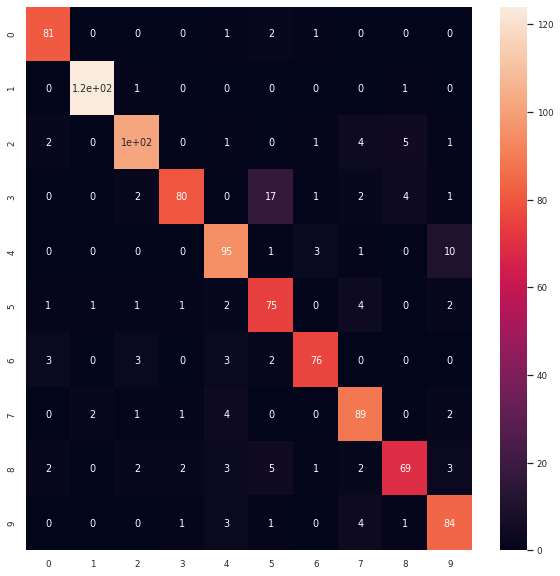

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
import logging
from typing import Optional, Union, TYPE_CHECKING
from scipy.stats import truncnorm
from tqdm.auto import trange
from art.attacks.evasion.fast_gradient import FastGradientMethod
from art.config import ART_NUMPY_DTYPE
from art.estimators.classification.classifier import ClassifierMixin
from art.estimators.estimator import BaseEstimator, LossGradientsMixin
from art.utils import compute_success, get_labels_np_array, check_and_transform_label_format, compute_success_array
from art.summary_writer import SummaryWriter
from art.estimators.classification.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import SklearnClassifier
from art.utils import load_mnist
from art.attacks.evasion.projected_gradient_descent.projected_gradient_descent_numpy import ProjectedGradientDescentNumpy


(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()
(x_train, y_train), (x_test, y_test) = (x_train[:1000], y_train[:1000]), (x_test[:1000], y_test[:1000])

# Step 1a: Flatten dataset

nb_samples_train = x_train.shape[0]
nb_samples_test = x_test.shape[0]
x_train = x_train.reshape((nb_samples_train, 28 * 28))
x_test = x_test.reshape((nb_samples_test, 28 * 28))

# Step 2: Create the model

model = SVC(C=1.0, kernel="rbf")

# Step 3: Create the ART classifier

classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))
classifier.fit(x_train,y_train)
y, y_hat = conf_matrix(classifier,x_test,y_test)


### traying to evalute the classifier on the crrupt data (after the attack)

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.56      0.40      0.47        97
           1       0.00      0.00      0.00       116
           2       0.10      0.33      0.15        99
           3       0.08      0.08      0.08        93
           4       0.02      0.01      0.01       105
           5       0.13      0.24      0.17        92
           6       0.00      0.00      0.00        94
           7       0.00      0.00      0.00       117
           8       0.07      0.15      0.10        87
           9       0.02      0.01      0.01       100

    accuracy                           0.12      1000
   macro avg       0.10      0.12      0.10      1000
weighted avg       0.09      0.12      0.09      1000

Time of attack if 3186.5157861709595


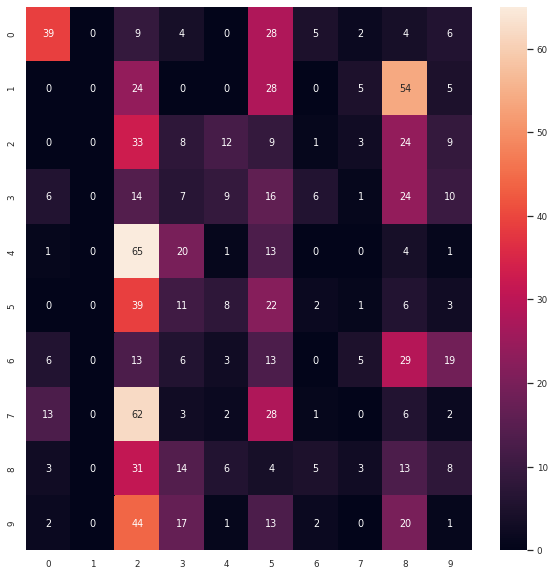

In [ ]:
T = time.time()
p = ProjectedGradientDescentNumpy(estimator=classifier)
adv = p.generate(x_train[:1000],y_train[:1000])
y, y_hat = conf_matrix(classifier,adv,y_train[:1000])
print(f"Time of attack if {time.time() - T}")

### Let's see if wee can see the difference(resolution is low so we will)

True input


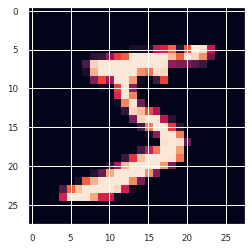


 After attack input


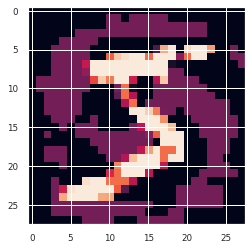

True input


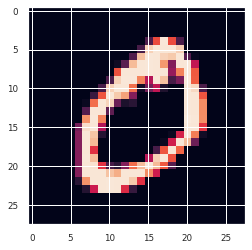


 After attack input


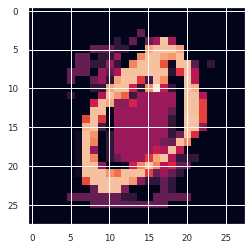

True input


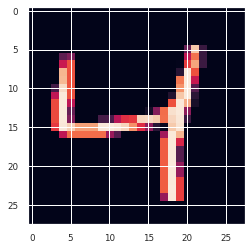


 After attack input


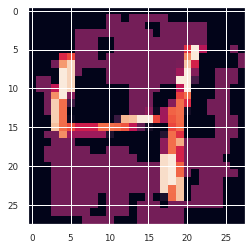

True input


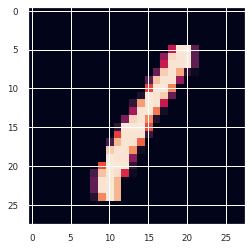


 After attack input


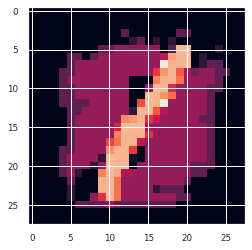

True input


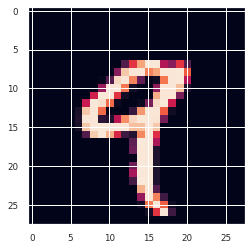


 After attack input


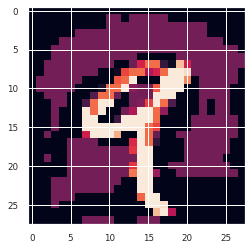

True input


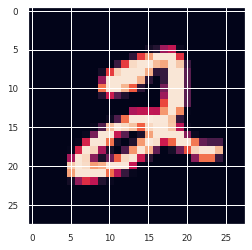


 After attack input


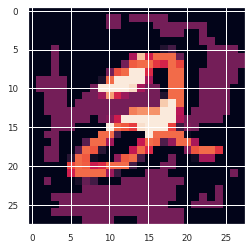

True input


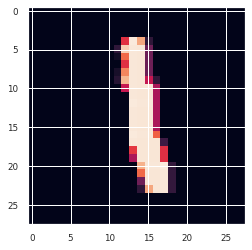


 After attack input


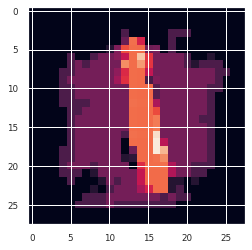

True input


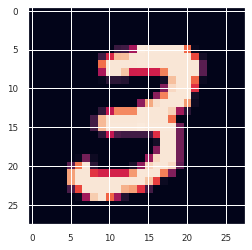


 After attack input


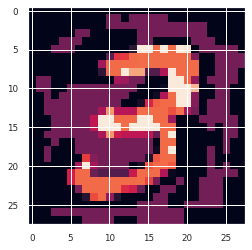

True input


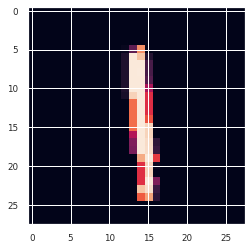


 After attack input


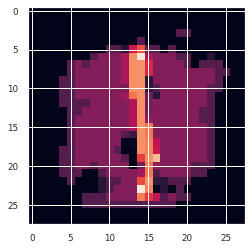

True input


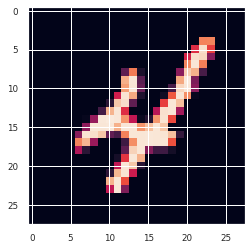


 After attack input


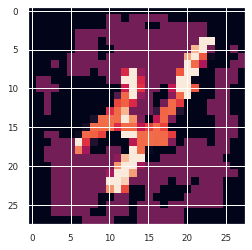

True input


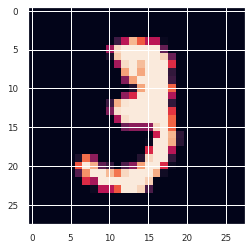


 After attack input


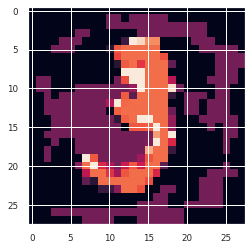

True input


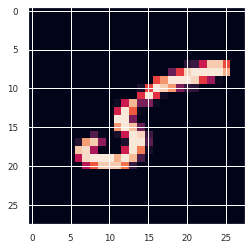


 After attack input


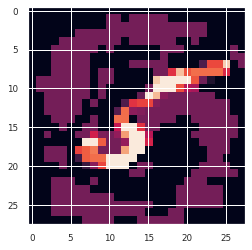

True input


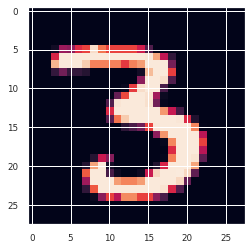


 After attack input


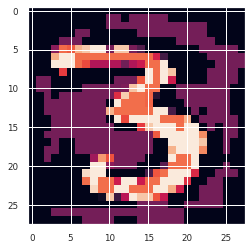

True input


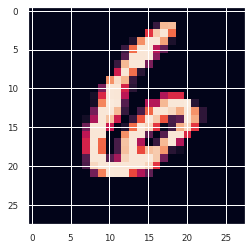


 After attack input


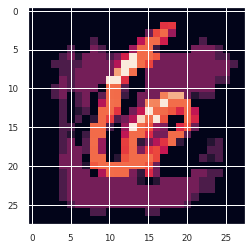

True input


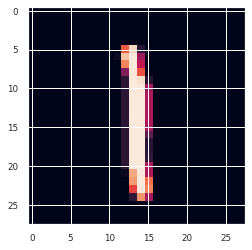


 After attack input


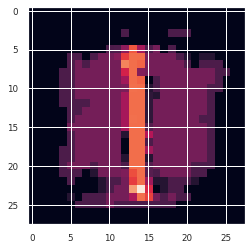

True input


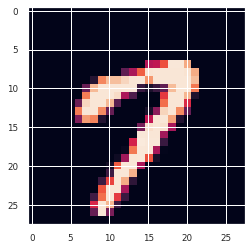


 After attack input


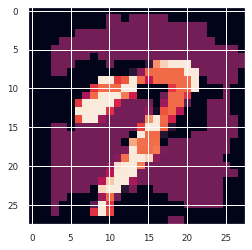

True input


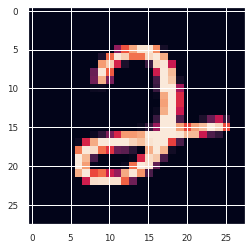


 After attack input


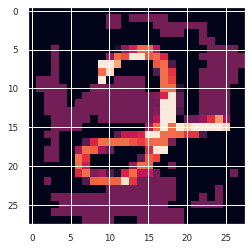

True input


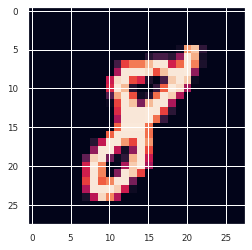


 After attack input


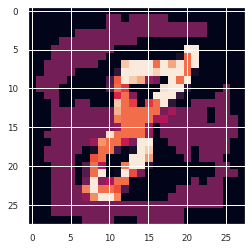

True input


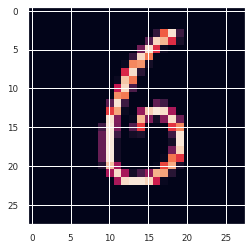


 After attack input


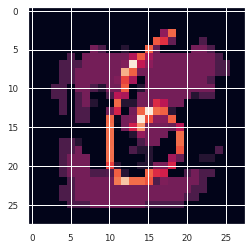

True input


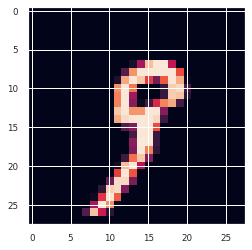


 After attack input


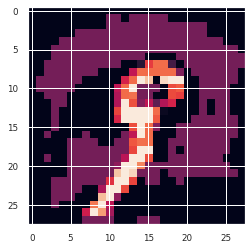

In [ ]:
def get_pics_before_and_after_attack(x,currpt_x,num_of_pics):

  data = [[x[i],currpt_x[i]] for i in range(num_of_pics)]
  for true_x, currpt in data:
    true_x = true_x.reshape((28,28))
    currpt = currpt.reshape((28,28))
    print("True input")
    plt.imshow(true_x, interpolation='nearest')
    plt.show()
    print("\n After attack input")
    plt.imshow(currpt, interpolation='nearest')
    plt.show()
  
get_pics_before_and_after_attack(x_train[:1000],adv,20)

## art lib modification to PGD with the addition of early stoppage methon in `FastGradientMethod` class  
###Note: I don't have the method `to_stop`  on the `FastGradientMethod` class in master version so I'll only show an example of it's logic implemented on `ProjectedGradientDescentNumpy` class. 
---------------------------------------------------------------------
### The logic behind the early stppage is to evalute when the input data has been through sufficient attck (the sufficient is by some threshold).
### We evaluate if the algorithm made it to the threshold with every "wrong" gradient step we take.  

# Original art lib impelmetation

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
from typing import Optional, Union, TYPE_CHECKING

import numpy as np
from scipy.stats import truncnorm
from tqdm.auto import trange

from art.attacks.evasion.fast_gradient import FastGradientMethod
from art.config import ART_NUMPY_DTYPE
from art.estimators.classification.classifier import ClassifierMixin
from art.estimators.estimator import BaseEstimator, LossGradientsMixin
from art.utils import compute_success, get_labels_np_array, check_and_transform_label_format, compute_success_array
from art.summary_writer import SummaryWriter

if TYPE_CHECKING:
    from art.utils import CLASSIFIER_LOSS_GRADIENTS_TYPE, OBJECT_DETECTOR_TYPE

logger = logging.getLogger(__name__)


class ProjectedGradientDescentCommon(FastGradientMethod):
    """
    Common class for different variations of implementation of the Projected Gradient Descent attack. The attack is an
    iterative method in which, after each iteration, the perturbation is projected on an lp-ball of specified radius (in
    addition to clipping the values of the adversarial sample so that it lies in the permitted data range). This is the
    attack proposed by Madry et al. for adversarial training.

    | Paper link: https://arxiv.org/abs/1706.06083
    """

    attack_params = FastGradientMethod.attack_params + ["max_iter", "random_eps", "verbose"]
    _estimator_requirements = (BaseEstimator, LossGradientsMixin)

    def __init__(
        self,
        estimator: Union["CLASSIFIER_LOSS_GRADIENTS_TYPE", "OBJECT_DETECTOR_TYPE"],
        norm: Union[int, float, str] = np.inf,
        eps: Union[int, float, np.ndarray] = 0.3,
        eps_step: Union[int, float, np.ndarray] = 0.1,
        decay: Optional[float] = None,
        max_iter: int = 100,
        targeted: bool = False,
        num_random_init: int = 0,
        batch_size: int = 32,
        random_eps: bool = False,
        summary_writer: Union[str, bool, SummaryWriter] = False,
        verbose: bool = True,
    ) -> None:
        """
        Create a :class:`.ProjectedGradientDescentCommon` instance.

        :param estimator: A trained classifier.
        :param norm: The norm of the adversarial perturbation supporting "inf", np.inf, 1 or 2.
        :param eps: Maximum perturbation that the attacker can introduce.
        :param eps_step: Attack step size (input variation) at each iteration.
        :param random_eps: When True, epsilon is drawn randomly from truncated normal distribution. The literature
            suggests this for FGSM based training to generalize across different epsilons. eps_step is
            modified to preserve the ratio of eps / eps_step. The effectiveness of this method with PGD
            is untested (https://arxiv.org/pdf/1611.01236.pdf).
        :param decay: Decay factor for accumulating the velocity vector when using momentum.
        :param max_iter: The maximum number of iterations.
        :param targeted: Indicates whether the attack is targeted (True) or untargeted (False).
        :param num_random_init: Number of random initialisations within the epsilon ball. For num_random_init=0
            starting at the original input.
        :param batch_size: Size of the batch on which adversarial samples are generated.
        :param summary_writer: Activate summary writer for TensorBoard.
                               Default is `False` and deactivated summary writer.
                               If `True` save runs/CURRENT_DATETIME_HOSTNAME in current directory.
                               If of type `str` save in path.
                               If of type `SummaryWriter` apply provided custom summary writer.
                               Use hierarchical folder structure to compare between runs easily. e.g. pass in
                               ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.
        :param verbose: Show progress bars.
        """
        super().__init__(
            estimator=estimator,  # type: ignore
            norm=norm,
            eps=eps,
            eps_step=eps_step,
            targeted=targeted,
            num_random_init=num_random_init,
            batch_size=batch_size,
            minimal=False,
            summary_writer=summary_writer,
        )
        self.decay = decay
        self.max_iter = max_iter
        self.random_eps = random_eps
        self.verbose = verbose
        ProjectedGradientDescentCommon._check_params(self)

        lower: Union[int, float, np.ndarray]
        upper: Union[int, float, np.ndarray]
        var_mu: Union[int, float, np.ndarray]
        sigma: Union[int, float, np.ndarray]

        if self.random_eps:
            if isinstance(eps, (int, float)):
                lower, upper = 0, eps
                var_mu, sigma = 0, (eps / 2)
            else:
                lower, upper = np.zeros_like(eps), eps
                var_mu, sigma = np.zeros_like(eps), (eps / 2)

            self.norm_dist = truncnorm((lower - var_mu) / sigma, (upper - var_mu) / sigma, loc=var_mu, scale=sigma)

    def _random_eps(self):
        """
        Check whether random eps is enabled, then scale eps and eps_step appropriately.
        """
        if self.random_eps:
            ratio = self.eps_step / self.eps

            if isinstance(self.eps, (int, float)):
                self.eps = np.round(self.norm_dist.rvs(1)[0], 10)
            else:
                self.eps = np.round(self.norm_dist.rvs(size=self.eps.shape), 10)

            self.eps_step = ratio * self.eps

    def _set_targets(self, x: np.ndarray, y: Optional[np.ndarray], classifier_mixin: bool = True) -> np.ndarray:
        """
        Check and set up targets.

        :param x: An array with the original inputs.
        :param y: Target values (class labels) one-hot-encoded of shape `(nb_samples, nb_classes)` or indices of shape
                  (nb_samples,). Only provide this parameter if you'd like to use true labels when crafting adversarial
                  samples. Otherwise, model predictions are used as labels to avoid the "label leaking" effect
                  (explained in this paper: https://arxiv.org/abs/1611.01236). Default is `None`.
        :param classifier_mixin: Whether the estimator is of type `ClassifierMixin`.
        :return: The targets.
        """
        if classifier_mixin:
            if y is not None:
                y = check_and_transform_label_format(y, nb_classes=self.estimator.nb_classes)

        if y is None:
            # Throw error if attack is targeted, but no targets are provided
            if self.targeted:  # pragma: no cover
                raise ValueError("Target labels `y` need to be provided for a targeted attack.")

            # Use model predictions as correct outputs
            if classifier_mixin:
                targets = get_labels_np_array(self.estimator.predict(x, batch_size=self.batch_size))
            else:
                targets = self.estimator.predict(x, batch_size=self.batch_size)

        else:
            targets = y

        return targets

    def _check_params(self) -> None:  # pragma: no cover

        if self.norm not in [1, 2, np.inf, "inf"]:
            raise ValueError('Norm order must be either 1, 2, `np.inf` or "inf".')

        if not (
            isinstance(self.eps, (int, float))
            and isinstance(self.eps_step, (int, float))
            or isinstance(self.eps, np.ndarray)
            and isinstance(self.eps_step, np.ndarray)
        ):
            raise TypeError(
                "The perturbation size `eps` and the perturbation step-size `eps_step` must have the same type of `int`"
                ", `float`, or `np.ndarray`."
            )

        if isinstance(self.eps, (int, float)):
            if self.eps < 0:
                raise ValueError("The perturbation size `eps` has to be non-negative.")
        else:
            if (self.eps < 0).any():
                raise ValueError("The perturbation size `eps` has to be non-negative.")

        if isinstance(self.eps_step, (int, float)):
            if self.eps_step <= 0:
                raise ValueError("The perturbation step-size `eps_step` has to be positive.")
        else:
            if (self.eps_step <= 0).any():
                raise ValueError("The perturbation step-size `eps_step` has to be positive.")

        if isinstance(self.eps, np.ndarray) and isinstance(self.eps_step, np.ndarray):
            if self.eps.shape != self.eps_step.shape:
                raise ValueError(
                    "The perturbation size `eps` and the perturbation step-size `eps_step` must have the same shape."
                )

        if not isinstance(self.targeted, bool):
            raise ValueError("The flag `targeted` has to be of type bool.")

        if not isinstance(self.num_random_init, int):
            raise TypeError("The number of random initialisations has to be of type integer.")

        if self.num_random_init < 0:
            raise ValueError("The number of random initialisations `random_init` has to be greater than or equal to 0.")

        if self.batch_size <= 0:
            raise ValueError("The batch size `batch_size` has to be positive.")

        if self.max_iter < 0:
            raise ValueError("The number of iterations `max_iter` has to be a non-negative integer.")

        if self.decay is not None and self.decay < 0.0:
            raise ValueError("The decay factor `decay` has to be a nonnegative float.")

        if not isinstance(self.verbose, bool):
            raise ValueError("The verbose has to be a Boolean.")


class ProjectedGradientDescentNumpy(ProjectedGradientDescentCommon):
    """
    The Projected Gradient Descent attack is an iterative method in which, after each iteration, the perturbation is
    projected on an lp-ball of specified radius (in addition to clipping the values of the adversarial sample so that it
    lies in the permitted data range). This is the attack proposed by Madry et al. for adversarial training.

    | Paper link: https://arxiv.org/abs/1706.06083
    """

    def __init__(
        self,
        estimator: Union["CLASSIFIER_LOSS_GRADIENTS_TYPE", "OBJECT_DETECTOR_TYPE"],
        norm: Union[int, float, str] = np.inf,
        eps: Union[int, float, np.ndarray] = 0.3,
        eps_step: Union[int, float, np.ndarray] = 0.1,
        decay: Optional[float] = None,
        max_iter: int = 100,
        targeted: bool = False,
        num_random_init: int = 0,
        batch_size: int = 32,
        random_eps: bool = False,
        summary_writer: Union[str, bool, SummaryWriter] = False,
        verbose: bool = True,
    ) -> None:
        """
        Create a :class:`.ProjectedGradientDescentNumpy` instance.

        :param estimator: An trained estimator.
        :param norm: The norm of the adversarial perturbation supporting "inf", np.inf, 1 or 2.
        :param eps: Maximum perturbation that the attacker can introduce.
        :param eps_step: Attack step size (input variation) at each iteration.
        :param random_eps: When True, epsilon is drawn randomly from truncated normal distribution. The literature
                           suggests this for FGSM based training to generalize across different epsilons. eps_step
                           is modified to preserve the ratio of eps / eps_step. The effectiveness of this method with
                           PGD is untested (https://arxiv.org/pdf/1611.01236.pdf).
        :param max_iter: The maximum number of iterations.
        :param targeted: Indicates whether the attack is targeted (True) or untargeted (False)
        :param num_random_init: Number of random initialisations within the epsilon ball. For num_random_init=0 starting
                                at the original input.
        :param batch_size: Size of the batch on which adversarial samples are generated.
        :param summary_writer: Activate summary writer for TensorBoard.
                               Default is `False` and deactivated summary writer.
                               If `True` save runs/CURRENT_DATETIME_HOSTNAME in current directory.
                               If of type `str` save in path.
                               If of type `SummaryWriter` apply provided custom summary writer.
                               Use hierarchical folder structure to compare between runs easily. e.g. pass in
                               ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.
        :param verbose: Show progress bars.
        """
        if summary_writer and num_random_init > 1:
            raise ValueError("TensorBoard is not yet supported for more than 1 random restart (num_random_init>1).")

        super().__init__(
            estimator=estimator,
            norm=norm,
            eps=eps,
            eps_step=eps_step,
            decay=decay,
            max_iter=max_iter,
            targeted=targeted,
            num_random_init=num_random_init,
            batch_size=batch_size,
            random_eps=random_eps,
            summary_writer=summary_writer,
            verbose=verbose,
        )

        self._project = True

    def generate(self, x: np.ndarray, y: Optional[np.ndarray] = None, **kwargs) -> np.ndarray:
        """
        Generate adversarial samples and return them in an array.

        :param x: An array with the original inputs.
        :param y: Target values (class labels) one-hot-encoded of shape `(nb_samples, nb_classes)` or indices of shape
                  (nb_samples,). Only provide this parameter if you'd like to use true labels when crafting adversarial
                  samples. Otherwise, model predictions are used as labels to avoid the "label leaking" effect
                  (explained in this paper: https://arxiv.org/abs/1611.01236). Default is `None`.

        :param mask: An array with a mask broadcastable to input `x` defining where to apply adversarial perturbations.
                     Shape needs to be broadcastable to the shape of x and can also be of the same shape as `x`. Any
                     features for which the mask is zero will not be adversarially perturbed.
        :type mask: `np.ndarray`
        :return: An array holding the adversarial examples.
        """
        mask = self._get_mask(x, **kwargs)

        # Ensure eps is broadcastable
        self._check_compatibility_input_and_eps(x=x)

        # Check whether random eps is enabled
        self._random_eps()

        if isinstance(self.estimator, ClassifierMixin):
            # Set up targets
            targets = self._set_targets(x, y)

            # Start to compute adversarial examples
            adv_x = x.astype(ART_NUMPY_DTYPE)

            for batch_id in range(int(np.ceil(x.shape[0] / float(self.batch_size)))):

                self._batch_id = batch_id

                for rand_init_num in trange(
                    max(1, self.num_random_init), desc="PGD - Random Initializations", disable=not self.verbose
                ):
                    batch_index_1, batch_index_2 = batch_id * self.batch_size, (batch_id + 1) * self.batch_size
                    batch_index_2 = min(batch_index_2, x.shape[0])
                    batch = x[batch_index_1:batch_index_2]
                    batch_labels = targets[batch_index_1:batch_index_2]
                    mask_batch = mask

                    if mask is not None:
                        if len(mask.shape) == len(x.shape):
                            mask_batch = mask[batch_index_1:batch_index_2]

                    momentum = np.zeros(batch.shape)

                    for i_max_iter in trange(
                        self.max_iter, desc="PGD - Iterations", leave=False, disable=not self.verbose
                    ):
                        self._i_max_iter = i_max_iter

                        batch = self._compute(
                            batch,
                            x[batch_index_1:batch_index_2],
                            batch_labels,
                            mask_batch,
                            self.eps,
                            self.eps_step,
                            self._project,
                            self.num_random_init > 0 and i_max_iter == 0,
                            self._batch_id,
                            decay=self.decay,
                            momentum=momentum,
                        )

                    if rand_init_num == 0:
                        # initial (and possibly only) random restart: we only have this set of
                        # adversarial examples for now
                        adv_x[batch_index_1:batch_index_2] = np.copy(batch)

                    else:
                        # replace adversarial examples if they are successful
                        attack_success = compute_success_array(
                            self.estimator,  # type: ignore
                            x[batch_index_1:batch_index_2],
                            targets[batch_index_1:batch_index_2],
                            batch,
                            self.targeted,
                            batch_size=self.batch_size,
                        )
                        adv_x[batch_index_1:batch_index_2][attack_success] = batch[attack_success]

            logger.info(
                "Success rate of attack: %.2f%%",
                100
                * compute_success(
                    self.estimator,  # type: ignore
                    x,
                    targets,
                    adv_x,
                    self.targeted,
                    batch_size=self.batch_size,  # type: ignore
                ),
            )
        else:
            if self.num_random_init > 0:  # pragma: no cover
                raise ValueError("Random initialisation is only supported for classification.")

            # Set up targets
            targets = self._set_targets(x, y, classifier_mixin=False)

            # Start to compute adversarial examples
            if x.dtype == object:
                adv_x = x.copy()
            else:
                adv_x = x.astype(ART_NUMPY_DTYPE)

            momentum = np.zeros(adv_x.shape)

            for i_max_iter in trange(self.max_iter, desc="PGD - Iterations", disable=not self.verbose):
                self._i_max_iter = i_max_iter

                adv_x = self._compute(
                    adv_x,
                    x,
                    targets,
                    mask,
                    self.eps,
                    self.eps_step,
                    self._project,
                    self.num_random_init > 0 and i_max_iter == 0,
                    decay=self.decay,
                    momentum=momentum,
                )

        if self.summary_writer is not None:
            self.summary_writer.reset()

        return adv_x


# Let's create a method to help us with early stoppage:

## `to_stop` is a method that will be implemted on `FastGradientMethod` class and help us preform an early stoppage.
##The `ProjectedGradientDescentCommon` class inherits from `FastGradientMethod`  class and `ProjectedGradientDescentNumpy` class is inherits from `ProjectedGradientDescentCommon`class. 
##Therefore we can use the `to_stop` method in `ProjectedGradientDescentCommon` and preform an early stoppage with it. 

# Note: just for the task I implemted it on  `ProjectedGradientDescentNumpy` for simplicity. 


In [10]:
def to_stop(self,x_clean,labels,x_adv,success_thrashold=1):
  """
  This functuon return a if there we need to stop iterating, it implemnted in FastGradientMethod class(which PGD classes inherit from) there for it's acsseible to them. 
  :param classifier: Classifier used for prediction.
  :param x_clean: Original clean samples.
  :param labels: Correct labels of `x_clean` if the attack is untargeted, or target labels of the attack otherwise.
  :param x_adv: Adversarial samples to be evaluated.
  :param success_thrashold: the rate of adversarial examples (being generated) which fool the model.
  :return: bool -> True for stop and Flase otherwise
  """
  if success_thrashold > 1 or success_thrashold < 0:
    raise ValueError("Threshold must be in range [0,1]")
  attack_success_rate = compute_success(
    self.estimator,  # type: ignore
    x_clean,
    labels,
    x_adv,
    self.targeted,
    batch_size=self.batch_size,
)
  return attack_success_rate >= success_thrashold

## Modifide art lib impelmetation
###We added to params to the `ProjectedGradientDescentNumpy.genrate()` method:
###1.early stoppage: a boolian to indicates whether to early stop or not
###2.thrashold: attcker can spesicfy a rate of sucsses(range [0-1]) in the attack.

In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
from typing import Optional, Union, TYPE_CHECKING

import numpy as np
from scipy.stats import truncnorm
from tqdm.auto import trange

from art.attacks.evasion.fast_gradient import FastGradientMethod
from art.config import ART_NUMPY_DTYPE
from art.estimators.classification.classifier import ClassifierMixin
from art.estimators.estimator import BaseEstimator, LossGradientsMixin
from art.utils import compute_success, get_labels_np_array, check_and_transform_label_format, compute_success_array
from art.summary_writer import SummaryWriter

if TYPE_CHECKING:
    from art.utils import CLASSIFIER_LOSS_GRADIENTS_TYPE, OBJECT_DETECTOR_TYPE

logger = logging.getLogger(__name__)


class ProjectedGradientDescentCommon(FastGradientMethod):
    """
    Common class for different variations of implementation of the Projected Gradient Descent attack. The attack is an
    iterative method in which, after each iteration, the perturbation is projected on an lp-ball of specified radius (in
    addition to clipping the values of the adversarial sample so that it lies in the permitted data range). This is the
    attack proposed by Madry et al. for adversarial training.

    | Paper link: https://arxiv.org/abs/1706.06083
    """

    attack_params = FastGradientMethod.attack_params + ["max_iter", "random_eps", "verbose"]
    _estimator_requirements = (BaseEstimator, LossGradientsMixin)

    def __init__(
        self,
        estimator: Union["CLASSIFIER_LOSS_GRADIENTS_TYPE", "OBJECT_DETECTOR_TYPE"],
        norm: Union[int, float, str] = np.inf,
        eps: Union[int, float, np.ndarray] = 0.3,
        eps_step: Union[int, float, np.ndarray] = 0.1,
        decay: Optional[float] = None,
        max_iter: int = 100,
        targeted: bool = False,
        num_random_init: int = 0,
        batch_size: int = 32,
        random_eps: bool = False,
        summary_writer: Union[str, bool, SummaryWriter] = False,
        verbose: bool = True,
    ) -> None:
        """
        Create a :class:`.ProjectedGradientDescentCommon` instance.

        :param estimator: A trained classifier.
        :param norm: The norm of the adversarial perturbation supporting "inf", np.inf, 1 or 2.
        :param eps: Maximum perturbation that the attacker can introduce.
        :param eps_step: Attack step size (input variation) at each iteration.
        :param random_eps: When True, epsilon is drawn randomly from truncated normal distribution. The literature
            suggests this for FGSM based training to generalize across different epsilons. eps_step is
            modified to preserve the ratio of eps / eps_step. The effectiveness of this method with PGD
            is untested (https://arxiv.org/pdf/1611.01236.pdf).
        :param decay: Decay factor for accumulating the velocity vector when using momentum.
        :param max_iter: The maximum number of iterations.
        :param targeted: Indicates whether the attack is targeted (True) or untargeted (False).
        :param num_random_init: Number of random initialisations within the epsilon ball. For num_random_init=0
            starting at the original input.
        :param batch_size: Size of the batch on which adversarial samples are generated.
        :param summary_writer: Activate summary writer for TensorBoard.
                               Default is `False` and deactivated summary writer.
                               If `True` save runs/CURRENT_DATETIME_HOSTNAME in current directory.
                               If of type `str` save in path.
                               If of type `SummaryWriter` apply provided custom summary writer.
                               Use hierarchical folder structure to compare between runs easily. e.g. pass in
                               ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.
        :param verbose: Show progress bars.
        """
        super().__init__(
            estimator=estimator,  # type: ignore
            norm=norm,
            eps=eps,
            eps_step=eps_step,
            targeted=targeted,
            num_random_init=num_random_init,
            batch_size=batch_size,
            minimal=False,
            summary_writer=summary_writer,
        )
        self.decay = decay
        self.max_iter = max_iter
        self.random_eps = random_eps
        self.verbose = verbose
        ProjectedGradientDescentCommon._check_params(self)

        lower: Union[int, float, np.ndarray]
        upper: Union[int, float, np.ndarray]
        var_mu: Union[int, float, np.ndarray]
        sigma: Union[int, float, np.ndarray]

        if self.random_eps:
            if isinstance(eps, (int, float)):
                lower, upper = 0, eps
                var_mu, sigma = 0, (eps / 2)
            else:
                lower, upper = np.zeros_like(eps), eps
                var_mu, sigma = np.zeros_like(eps), (eps / 2)

            self.norm_dist = truncnorm((lower - var_mu) / sigma, (upper - var_mu) / sigma, loc=var_mu, scale=sigma)

    def _random_eps(self):
        """
        Check whether random eps is enabled, then scale eps and eps_step appropriately.
        """
        if self.random_eps:
            ratio = self.eps_step / self.eps

            if isinstance(self.eps, (int, float)):
                self.eps = np.round(self.norm_dist.rvs(1)[0], 10)
            else:
                self.eps = np.round(self.norm_dist.rvs(size=self.eps.shape), 10)

            self.eps_step = ratio * self.eps

    def _set_targets(self, x: np.ndarray, y: Optional[np.ndarray], classifier_mixin: bool = True) -> np.ndarray:
        """
        Check and set up targets.

        :param x: An array with the original inputs.
        :param y: Target values (class labels) one-hot-encoded of shape `(nb_samples, nb_classes)` or indices of shape
                  (nb_samples,). Only provide this parameter if you'd like to use true labels when crafting adversarial
                  samples. Otherwise, model predictions are used as labels to avoid the "label leaking" effect
                  (explained in this paper: https://arxiv.org/abs/1611.01236). Default is `None`.
        :param classifier_mixin: Whether the estimator is of type `ClassifierMixin`.
        :return: The targets.
        """
        if classifier_mixin:
            if y is not None:
                y = check_and_transform_label_format(y, nb_classes=self.estimator.nb_classes)

        if y is None:
            # Throw error if attack is targeted, but no targets are provided
            if self.targeted:  # pragma: no cover
                raise ValueError("Target labels `y` need to be provided for a targeted attack.")

            # Use model predictions as correct outputs
            if classifier_mixin:
                targets = get_labels_np_array(self.estimator.predict(x, batch_size=self.batch_size))
            else:
                targets = self.estimator.predict(x, batch_size=self.batch_size)

        else:
            targets = y

        return targets

    def _check_params(self) -> None:  # pragma: no cover

        if self.norm not in [1, 2, np.inf, "inf"]:
            raise ValueError('Norm order must be either 1, 2, `np.inf` or "inf".')

        if not (
            isinstance(self.eps, (int, float))
            and isinstance(self.eps_step, (int, float))
            or isinstance(self.eps, np.ndarray)
            and isinstance(self.eps_step, np.ndarray)
        ):
            raise TypeError(
                "The perturbation size `eps` and the perturbation step-size `eps_step` must have the same type of `int`"
                ", `float`, or `np.ndarray`."
            )

        if isinstance(self.eps, (int, float)):
            if self.eps < 0:
                raise ValueError("The perturbation size `eps` has to be non-negative.")
        else:
            if (self.eps < 0).any():
                raise ValueError("The perturbation size `eps` has to be non-negative.")

        if isinstance(self.eps_step, (int, float)):
            if self.eps_step <= 0:
                raise ValueError("The perturbation step-size `eps_step` has to be positive.")
        else:
            if (self.eps_step <= 0).any():
                raise ValueError("The perturbation step-size `eps_step` has to be positive.")

        if isinstance(self.eps, np.ndarray) and isinstance(self.eps_step, np.ndarray):
            if self.eps.shape != self.eps_step.shape:
                raise ValueError(
                    "The perturbation size `eps` and the perturbation step-size `eps_step` must have the same shape."
                )

        if not isinstance(self.targeted, bool):
            raise ValueError("The flag `targeted` has to be of type bool.")

        if not isinstance(self.num_random_init, int):
            raise TypeError("The number of random initialisations has to be of type integer.")

        if self.num_random_init < 0:
            raise ValueError("The number of random initialisations `random_init` has to be greater than or equal to 0.")

        if self.batch_size <= 0:
            raise ValueError("The batch size `batch_size` has to be positive.")

        if self.max_iter < 0:
            raise ValueError("The number of iterations `max_iter` has to be a non-negative integer.")

        if self.decay is not None and self.decay < 0.0:
            raise ValueError("The decay factor `decay` has to be a nonnegative float.")

        if not isinstance(self.verbose, bool):
            raise ValueError("The verbose has to be a Boolean.")


class ProjectedGradientDescentNumpy2(ProjectedGradientDescentCommon):
    """
    The Projected Gradient Descent attack is an iterative method in which, after each iteration, the perturbation is
    projected on an lp-ball of specified radius (in addition to clipping the values of the adversarial sample so that it
    lies in the permitted data range). This is the attack proposed by Madry et al. for adversarial training.

    | Paper link: https://arxiv.org/abs/1706.06083
    """

    def __init__(
        self,
        estimator: Union["CLASSIFIER_LOSS_GRADIENTS_TYPE", "OBJECT_DETECTOR_TYPE"],
        norm: Union[int, float, str] = np.inf,
        eps: Union[int, float, np.ndarray] = 0.3,
        eps_step: Union[int, float, np.ndarray] = 0.1,
        decay: Optional[float] = None,
        max_iter: int = 100,
        targeted: bool = False,
        num_random_init: int = 0,
        batch_size: int = 32,
        random_eps: bool = False,
        summary_writer: Union[str, bool, SummaryWriter] = False,
        verbose: bool = True,
    ) -> None:
        """
        Create a :class:`.ProjectedGradientDescentNumpy` instance.

        :param estimator: An trained estimator.
        :param norm: The norm of the adversarial perturbation supporting "inf", np.inf, 1 or 2.
        :param eps: Maximum perturbation that the attacker can introduce.
        :param eps_step: Attack step size (input variation) at each iteration.
        :param random_eps: When True, epsilon is drawn randomly from truncated normal distribution. The literature
                           suggests this for FGSM based training to generalize across different epsilons. eps_step
                           is modified to preserve the ratio of eps / eps_step. The effectiveness of this method with
                           PGD is untested (https://arxiv.org/pdf/1611.01236.pdf).
        :param max_iter: The maximum number of iterations.
        :param targeted: Indicates whether the attack is targeted (True) or untargeted (False)
        :param num_random_init: Number of random initialisations within the epsilon ball. For num_random_init=0 starting
                                at the original input.
        :param batch_size: Size of the batch on which adversarial samples are generated.
        :param summary_writer: Activate summary writer for TensorBoard.
                               Default is `False` and deactivated summary writer.
                               If `True` save runs/CURRENT_DATETIME_HOSTNAME in current directory.
                               If of type `str` save in path.
                               If of type `SummaryWriter` apply provided custom summary writer.
                               Use hierarchical folder structure to compare between runs easily. e.g. pass in
                               ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.
        :param verbose: Show progress bars.
        """
        if summary_writer and num_random_init > 1:
            raise ValueError("TensorBoard is not yet supported for more than 1 random restart (num_random_init>1).")

        super().__init__(
            estimator=estimator,
            norm=norm,
            eps=eps,
            eps_step=eps_step,
            decay=decay,
            max_iter=max_iter,
            targeted=targeted,
            num_random_init=num_random_init,
            batch_size=batch_size,
            random_eps=random_eps,
            summary_writer=summary_writer,
            verbose=verbose,
        )

        self._project = True
        
    def to_stop(self,x_clean,labels,x_adv,success_thrashold=1):
        """
        This functuon return a if there we need to stop iterating, it implemnted in FastGradientMethod class(which PGD classes inherit from) there for it's acsseible to them. 
        :param classifier: Classifier used for prediction.
        :param x_clean: Original clean samples.
        :param labels: Correct labels of `x_clean` if the attack is untargeted, or target labels of the attack otherwise.
        :param x_adv: Adversarial samples to be evaluated.
        :param success_thrashold: the rate of adversarial examples (being generated) which fool the model.
        :return: bool -> True for stop and Flase otherwise
        """
        if success_thrashold > 1 or success_thrashold < 0:
          raise ValueError("Threshold must be in range [0,1]")
        attack_success_rate = compute_success(
          self.estimator,  # type: ignore
          x_clean,
          labels,
          x_adv,
          self.targeted,
          batch_size=self.batch_size,
      )
        return attack_success_rate >= success_thrashold

    def generate(self, x: np.ndarray, y: Optional[np.ndarray] = None, early_stoppage=False, success_thrashold=1, **kwargs) -> np.ndarray:
        """
        Generate adversarial samples and return them in an array.

        :param x: An array with the original inputs.
        :param y: Target values (class labels) one-hot-encoded of shape `(nb_samples, nb_classes)` or indices of shape
                  (nb_samples,). Only provide this parameter if you'd like to use true labels when crafting adversarial
                  samples. Otherwise, model predictions are used as labels to avoid the "label leaking" effect
                  (explained in this paper: https://arxiv.org/abs/1611.01236). Default is `None`.

        :param mask: An array with a mask broadcastable to input `x` defining where to apply adversarial perturbations.
                     Shape needs to be broadcastable to the shape of x and can also be of the same shape as `x`. Any
                     features for which the mask is zero will not be adversarially perturbed.
        :type mask: `np.ndarray`
        :return: An array holding the adversarial examples.
        """
        mask = self._get_mask(x, **kwargs)

        # Ensure eps is broadcastable
        self._check_compatibility_input_and_eps(x=x)

        # Check whether random eps is enabled
        self._random_eps()

        if isinstance(self.estimator, ClassifierMixin):
            # Set up targets
            targets = self._set_targets(x, y)

            # Start to compute adversarial examples
            adv_x = x.astype(ART_NUMPY_DTYPE)

            for batch_id in range(int(np.ceil(x.shape[0] / float(self.batch_size)))):

                self._batch_id = batch_id

                for rand_init_num in trange(
                    max(1, self.num_random_init), desc="PGD - Random Initializations", disable=not self.verbose
                ):
                    batch_index_1, batch_index_2 = batch_id * self.batch_size, (batch_id + 1) * self.batch_size
                    batch_index_2 = min(batch_index_2, x.shape[0])
                    batch = x[batch_index_1:batch_index_2]
                    batch_labels = targets[batch_index_1:batch_index_2]
                    mask_batch = mask

                    if mask is not None:
                        if len(mask.shape) == len(x.shape):
                            mask_batch = mask[batch_index_1:batch_index_2]

                    momentum = np.zeros(batch.shape)

                    for i_max_iter in trange(
                        self.max_iter, desc="PGD - Iterations", leave=False, disable=not self.verbose
                    ):
                        self._i_max_iter = i_max_iter

                        batch = self._compute(
                            batch,
                            x[batch_index_1:batch_index_2],
                            batch_labels,
                            mask_batch,
                            self.eps,
                            self.eps_step,
                            self._project,
                            self.num_random_init > 0 and i_max_iter == 0,
                            self._batch_id,
                            decay=self.decay,
                            momentum=momentum,
                        )
###########################################################################################################################
                        if early_stoppage:
                            if self.to_stop(x_clean=x[batch_index_1:batch_index_2],
                                            labels=targets[batch_index_1:batch_index_2],
                                            x_adv=batch,
                                            success_thrashold=success_thrashold):
                                break                      
###########################################################################################################################
                    if rand_init_num == 0:
                        # initial (and possibly only) random restart: we only have this set of
                        # adversarial examples for now
                        adv_x[batch_index_1:batch_index_2] = np.copy(batch)

                    else:
                        # replace adversarial examples if they are successful
                        attack_success = compute_success_array(
                            self.estimator,  # type: ignore
                            x[batch_index_1:batch_index_2],
                            targets[batch_index_1:batch_index_2],
                            batch,
                            self.targeted,
                            batch_size=self.batch_size,
                        )
                        adv_x[batch_index_1:batch_index_2][attack_success] = batch[attack_success]

            logger.info(
                "Success rate of attack: %.2f%%",
                100
                * compute_success(
                    self.estimator,  # type: ignore
                    x,
                    targets,
                    adv_x,
                    self.targeted,
                    batch_size=self.batch_size,  # type: ignore
                ),
            )
        else:
            if self.num_random_init > 0:  # pragma: no cover
                raise ValueError("Random initialisation is only supported for classification.")

            # Set up targets
            targets = self._set_targets(x, y, classifier_mixin=False)

            # Start to compute adversarial examples
            if x.dtype == object:
                adv_x = x.copy()
            else:
                adv_x = x.astype(ART_NUMPY_DTYPE)

            momentum = np.zeros(adv_x.shape)

            for i_max_iter in trange(self.max_iter, desc="PGD - Iterations", disable=not self.verbose):
                self._i_max_iter = i_max_iter

                adv_x = self._compute(
                    adv_x,
                    x,
                    targets,
                    mask,
                    self.eps,
                    self.eps_step,
                    self._project,
                    self.num_random_init > 0 and i_max_iter == 0,
                    decay=self.decay,
                    momentum=momentum,
                )

        if self.summary_writer is not None:
            self.summary_writer.reset()

        return adv_x

## Run the same attack but now we stop early(it took less then 2 min!)

In [12]:
# (x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()
# (x_train, y_train), (x_test, y_test) = (x_train[:1000], y_train[:1000]), (x_test[:1000], y_test[:1000])

# Step 1a: Flatten dataset

# nb_samples_train = x_train.shape[0]
# nb_samples_test = x_test.shape[0]
# x_train = x_train.reshape((nb_samples_train, 28 * 28))
# x_test = x_test.reshape((nb_samples_test, 28 * 28))

# Step 2: Create the model

model = SVC(C=1.0, kernel="rbf")

# Step 3: Create the ART classifier

classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))
classifier.fit(x_train,y_train)

T = time.time()

p = ProjectedGradientDescentNumpy2(estimator=classifier)
adv2 = p.generate(x_train,y_train,early_stoppage=True,success_thrashold=0.5)

print(f"Attack time is {time.time() - T}")

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

PGD - Random Initializations:   0%|          | 0/1 [00:00<?, ?it/s]

PGD - Iterations:   0%|          | 0/100 [00:00<?, ?it/s]

Attack time is 111.24107003211975


### We can see the attack went well(model's predictions are bad) and the run time is way better

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.49      0.39      0.44        97
           1       0.00      0.00      0.00       116
           2       0.17      0.56      0.26        99
           3       0.29      0.26      0.27        93
           4       0.24      0.09      0.13       105
           5       0.23      0.52      0.32        92
           6       0.29      0.06      0.10        94
           7       0.15      0.03      0.06       117
           8       0.15      0.28      0.20        87
           9       0.22      0.15      0.18       100

    accuracy                           0.22      1000
   macro avg       0.22      0.23      0.20      1000
weighted avg       0.22      0.22      0.19      1000



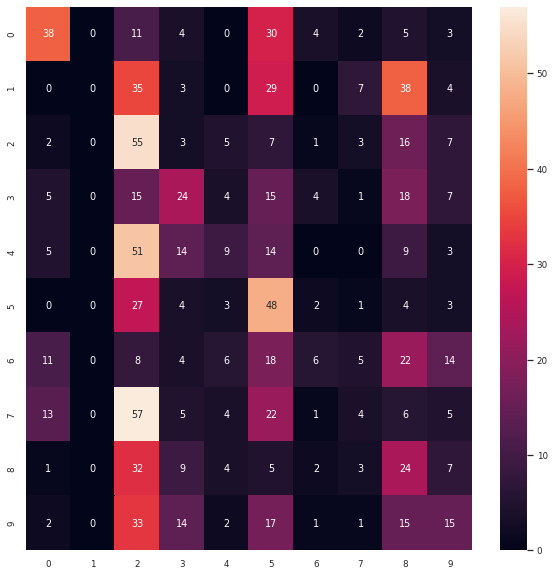

In [ ]:
y, y_hat = conf_matrix(classifier,adv2,y_train[:1000])